<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/Hypothesis_testing_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('synthetic_drug_study.csv')

In [ ]:
df.head()

,Drug,RecoveryDays,Age,Gender,SideEffects
0,A,13.24,21,M,NaN
1,A,11.65,45,M,NaN
2,A,13.62,36,M,NaN
3,A,15.81,59,M,NaN
4,A,11.41,52,F,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Drug          200 non-null    object 
 1   RecoveryDays  200 non-null    float64
 2   Age           200 non-null    int64  
 3   Gender        200 non-null    object 
 4   SideEffects   104 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,RecoveryDays,Age
count,200.000000,200.000000
mean,12.903700,45.290000
std,2.827884,14.222775
min,5.450000,20.000000
25%,10.847500,33.000000
50%,12.765000,45.000000
75%,14.712500,56.000000
max,22.160000,69.000000


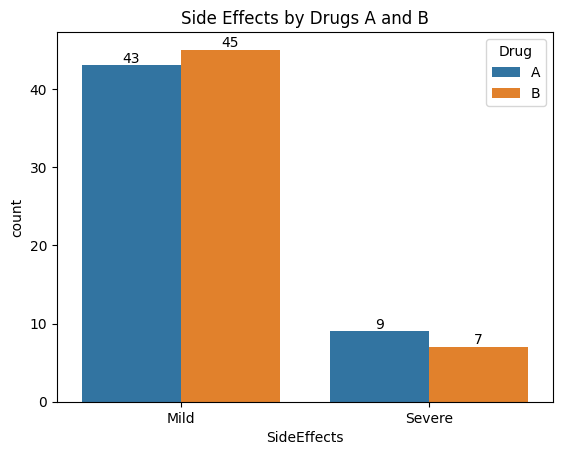

In [ ]:
ax = sns.countplot(x='SideEffects',hue='Drug', data=df)
plt.title('Side Effects by Drugs A and B')
# add count to the sns.countplot
for container in ax.containers:
    ax.bar_label(container)
plt.show()

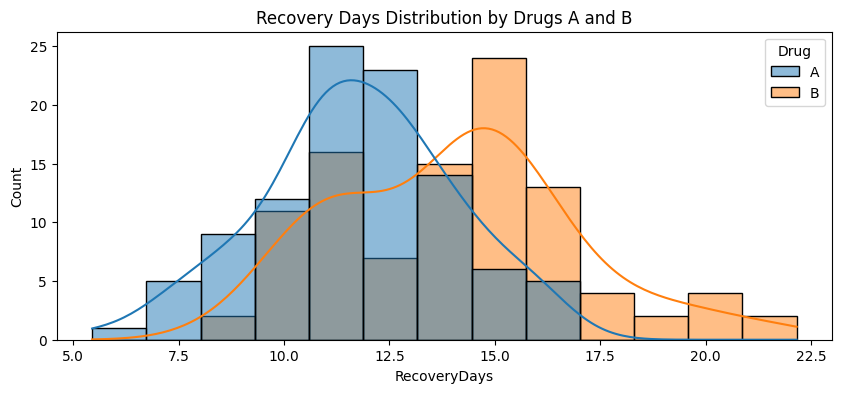

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='RecoveryDays', hue='Drug', kde=True)
plt.title('Recovery Days Distribution by Drugs A and B')
plt.show()

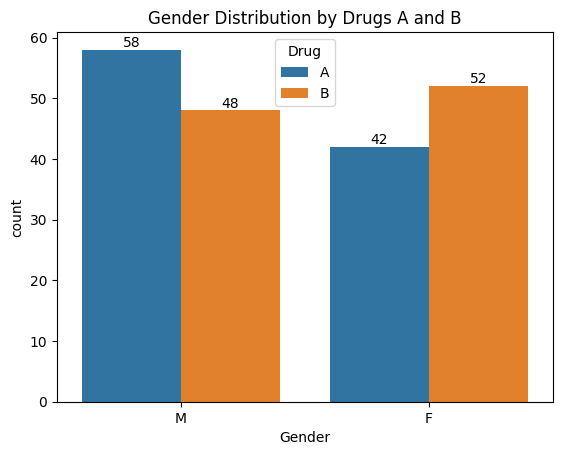

In [ ]:
# count plot for gender for drug A and B
ax = sns.countplot(x='Gender', hue='Drug', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution by Drugs A and B')
plt.show()

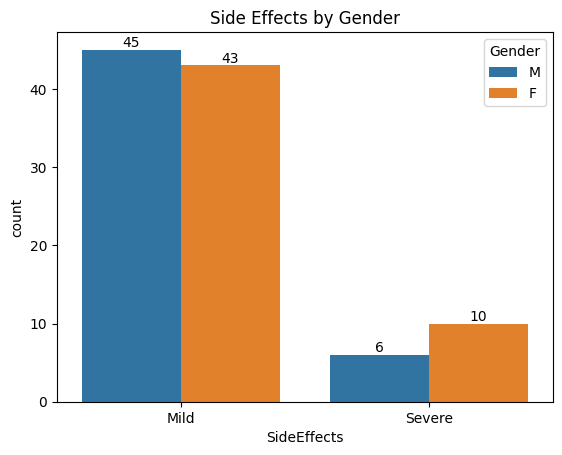

In [ ]:
# plot for side effects by gender
ax = sns.countplot(x='SideEffects', hue='Gender', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Side Effects by Gender')
plt.show()

In [ ]:
data = df[['Drug','RecoveryDays']]
# t test for drug and recovery days
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(data[data['Drug']=='A']['RecoveryDays'], data[data['Drug']=='B']['RecoveryDays'])
print(t_stat,p_val)

-6.369883604566288 1.2960699462689295e-09


In [ ]:
# Null Hypothesis (H₀):
# The null hypothesis here is that there is no difference in the average recovery days between patients taking Drug A and those taking Drug B.
# H₀: The mean recovery days for Drug A = The mean recovery days for Drug B
# Alternative Hypothesis (H₁):
# H₁: The mean recovery days for Drug A ≠ The mean recovery days for Drug B

############### conclusion
# There is a statistically significant difference in recovery time between Drug A and Drug B.
# Based on the negative t-statistic, Drug A has a significantly lower average recovery time than Drug B.
# 1. t-statistic = -6.37
# This tells how many standard errors the difference in means is from zero.
# A large absolute value (like 6.37) suggests a strong difference between the two groups.

# 2. p-value = 0.0000000013
# This is the probability of observing such a difference by random chance if both drugs were equally effective.
# Since this is far below any common significance level (like 0.05, 0.01, or even 0.001), you can reject the null hypothesis.
